<a href="https://colab.research.google.com/github/RJL08/Sistemas-de-aprendizaje-autm-tico/blob/main/PCA_UT5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import load_wine


In [3]:
# cargamos el dataset
wine = load_wine()
X=wine.data
# la y como si fuera el cluster (auqnue usmos pca)
y=wine.target
df=pd.DataFrame(X,columns=wine.feature_names)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

In [5]:
# 1º escalamos los datos con minmax
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


In [6]:
# primero aplicamos pca pero sin especificar el nº de componentes
pca = PCA()
pca.fit(X_scaled)
# calculamos la varianza explicada acumulada
explained_variance=pca.explained_variance_ratio_
cumulative_variance=explained_variance.cumsum()

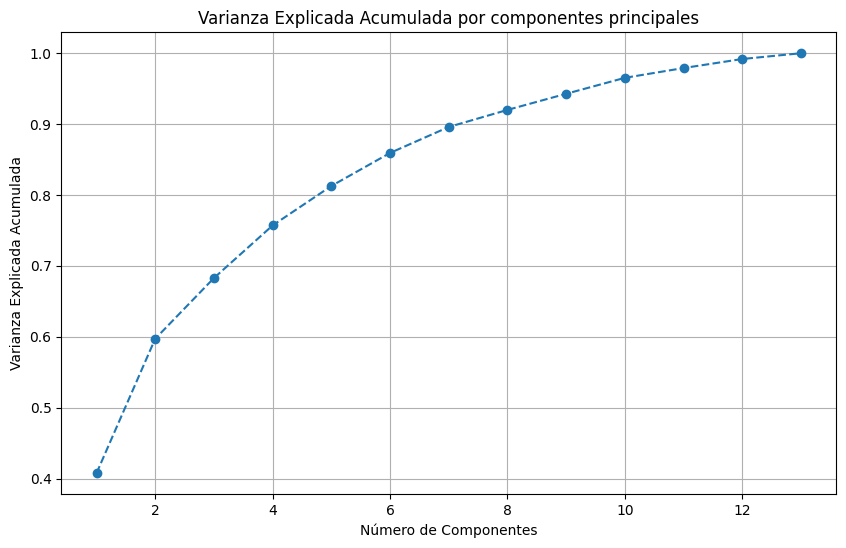

In [8]:
#Visualkizamos
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Varianza Explicada Acumulada por componentes principales')
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Explicada Acumulada')
plt.grid(True)
plt.show()

In [9]:
# vamos a usar PCA con dos componentes
pca_final=PCA(n_components=2)
X_pca=pca_final.fit_transform(X_scaled)

In [10]:
# creamos un dataframe
df_pca=pd.DataFrame(data=X_pca,columns=['PC1','PC2'])
df_pca['target']=y # añadimos de forma manual para ver como se distribuyen los datyos


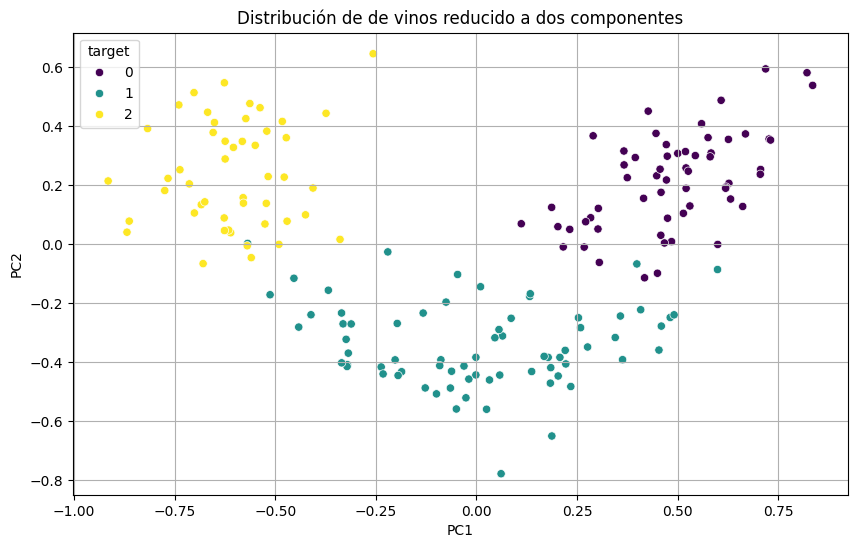

In [11]:
# representyamos los datos
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='target', palette='viridis')
plt.title('Distribución de de vinos reducido a dos componentes')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.show()

In [13]:
# visualizacion con 3 componentes
pca_final=PCA(n_components=3)
X_pca=pca_final.fit_transform(X_scaled)

#Crea un DataFrame para los componentes reducidos a 3 columnas
column_names=['PCA1','PCA2','PCA3']
df_pca=pd.DataFrame(data=X_pca,columns=column_names)
df_pca['target']=y

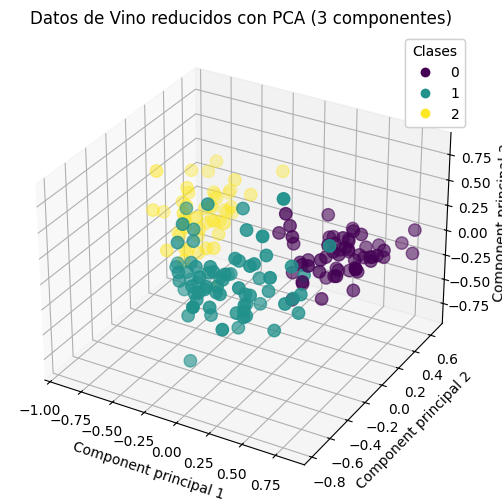

In [14]:
#Visualizamos los datos
fig=plt.figure(figsize=(8,6))
ax=fig.add_subplot(111,projection='3d')
#Dispersion 3D
scatter=ax.scatter(df_pca['PCA1'],df_pca['PCA2'],df_pca['PCA3'],
c=df_pca['target'], #un color a cada punto según el objetivo
cmap='viridis', #mapa de colores que se va a utilizar
s=80) #tamaño de los puntos

#Añadimos etiquetas y título al gráfico
ax.set_title('Datos de Vino reducidos con PCA (3 componentes)')
ax.set_xlabel('Component principal 1')
ax.set_ylabel('Component principal 2')
ax.set_zlabel('Component principal 3')

#Leyenda para los colores
legend=ax.legend(*scatter.legend_elements(),title='Clases')
ax.add_artist(legend)

plt.show()